# Repeating the same steps with the Dogs Vs Cats Redux Data Set

## These are the series of steps that need to be performed

To do:
1. create validation set and sample
2. move to separate dirs for each set
3. finetune and train
4. submit

In [24]:
from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline
path = 'data/redux/'
path2 = 'data/redux/sample/'

### Create Validation and Sample set

In [6]:
%pwd
%cd 'data/redux'
%mkdir valid
%mkdir sample
%mkdir sample/train
%mkdir sample/valid
%cd train

/home/ubuntu/nbs/data/redux/train


In [7]:
%pwd
g = glob('*.jpg')
shuff = np.random.permutation(g)
for i in range(2000): os.rename(shuff[i] , '../valid/'+ shuff[i])

In [8]:
%pwd
import shutil
g = glob('*.jpg')
shuff = np.random.permutation(g)
for i in range(200): shutil.copyfile(shuff[i], '../sample/train/'+shuff[i])

In [9]:
%cd '../valid'
g = glob('*.jpg')
shuff = np.random.permutation(g)
for i in range(50): shutil.copyfile(shuff[i], '../sample/valid/'+shuff[i])

/home/ubuntu/nbs/data/redux/valid


## Move all the cats and dogs file to the respective directories

In [11]:
%pwd
%cd ../
%pwd
%mkdir results/
%mkdir valid/cats
%mkdir valid/dogs
%mv valid/cat*.jpg valid/cats/
%mv valid/dog*.jpg valid/dogs/
%mkdir train/cats
%mkdir train/dogs
%mv train/cat*jpg train/cats/
%mv train/dog*jpg train/dogs/
%mkdir sample/train/cats
%mkdir sample/train/dogs
%mv sample/train/cat*.jpg sample/train/cats/
%mv sample/train/dog*.jpg sample/train/dogs/
%mkdir sample/valid/cats
%mkdir sample/valid/dogs
%mv sample/valid/cat*.jpg sample/valid/cats/
%mv sample/valid/dog*.jpg sample/valid/dogs/
%mkdir test/unknown
%mv test/*.jpg test/unknown/

/home/ubuntu/nbs/data/redux


In [66]:
import utils;reload(utils)
from utils import plots

In [4]:
batch_size = 64
batch_size_1 = 4
from vgg16 import Vgg16

In [5]:
vgg = Vgg16()
train_batch = vgg.get_batches(path+'train', batch_size=batch_size)
valid_batch = vgg.get_batches(path+'valid', batch_size=batch_size)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


(array([ 0.2342,  0.7215,  0.8981,  0.1457,  0.906 ,  0.7868,  0.8585,  0.7044,  0.3566,  0.1606,
         0.6507,  0.3171,  0.955 ,  0.9233,  0.288 ,  0.5009,  0.7491,  0.1286,  0.591 ,  0.7289,
         0.7689,  0.2995,  0.5156,  0.8487,  0.4438,  0.5482,  0.7994,  0.8008,  0.4322,  0.7339,
         0.5116,  0.9747,  0.8019,  0.7928,  0.9502,  0.4277,  0.9386,  0.3239,  0.2918,  0.668 ,
         0.5638,  0.772 ,  0.9902,  0.6574,  0.6374,  0.7415,  0.3544,  0.4488,  0.746 ,  0.48  ,
         0.8719,  0.7598,  0.1901,  0.7499,  0.3444,  0.655 ,  0.4991,  0.9764,  0.9622,  0.6962,
         0.7889,  0.2472,  0.9418,  0.6657], dtype=float32),
 array([188, 284, 237, 246, 247, 208, 163, 281, 999, 166, 285, 356, 208, 281, 284, 170, 211, 389,
        281, 284, 281, 176, 285, 283, 711, 281, 266, 332, 285, 281, 245, 283, 170, 165, 281, 244,
        237, 165, 285, 223, 285, 155, 246, 281, 285, 180, 246, 253, 281, 285, 281, 284, 187, 185,
        332, 285, 281, 212, 176, 283, 711, 154, 179, 161]

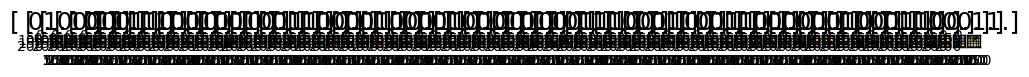

In [6]:
imgs, labels = next(train_batch)
plots(imgs, titles=labels)
vgg.predict(imgs, True)

## Now this section uses finetune methods and fit methods on the vgg model to predict cats and dogs

In [5]:
import time
vgg.finetune(train_batch)
%time vgg.fit(train_batch , valid_batch, nb_epoch=1)
vgg.model.save_weights(path+'results/ft1.h5')

Epoch 1/1
23000/23000 [==============================] - 597s - loss: 0.2126 - acc: 0.9570 - val_loss: 0.0808 - val_acc: 0.9810
CPU times: user 12min 38s, sys: 2min 13s, total: 14min 51s
Wall time: 10min 6s


## Running a few more epochs and saving the weights and loading the last weight from the last file saved

In [6]:
vgg.fit(train_batch , valid_batch,nb_epoch=1)
vgg.model.save_weights(path+'results/ft2.h5')
vgg.model.optimizer.lr = 0.01
vgg.fit(train_batch , valid_batch, nb_epoch=1)
vgg.model.save_weights(path+'results/ft3.h5')
vgg.model.load_weights(path+'results/ft3.h5')

## Now the Testing part and creating output file for Kaggle submission

In [6]:
batches, preds = vgg.test(path+'test', batch_size = batch_size*2)

Found 12500 images belonging to 1 classes.


In [7]:
filenames = batches.filenames
filenames[0:5]

['unknown/9292.jpg',
 'unknown/12026.jpg',
 'unknown/9688.jpg',
 'unknown/4392.jpg',
 'unknown/779.jpg']

In [8]:
preds[0:5]

array([[  1.0000e+00,   3.1503e-20],
       [  4.0610e-04,   9.9959e-01],
       [  9.9999e-01,   1.3012e-05],
       [  1.0000e+00,   3.8040e-20],
       [  1.4063e-14,   1.0000e+00]], dtype=float32)

#### Just to visualize some of the test Images

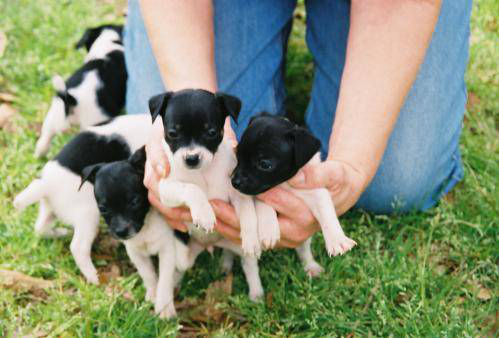

In [35]:
from PIL import Image
Image.open(path+'test/'+filenames[4])

### Creating the output in the submission sample csv as per Kaggle requirements - Grabbing second column from preds and the filename from the filenames variables

In [10]:
# isDog = preds[:,1]
# Try the np.clip option to clip the probabilities between 0.05 to 0.95
import numpy as np
isDog = np.clip(preds[:,1],0.05,0.95)
isDog[:5]
ids = [int(f[8:f.find('.')]) for f in filenames]
ids[:5]

[9292, 12026, 9688, 4392, 779]

In [12]:
submp = np.stack([ids,isDog], axis=1)
# type(submp)
submp[:8]
# np.savetxt(path+'subm20161231_2.csv',submp,fmt='%d,%.5f',header='id,label',comments='')

array([[  9.2920e+03,   5.0000e-02],
       [  1.2026e+04,   9.5000e-01],
       [  9.6880e+03,   5.0000e-02],
       [  4.3920e+03,   5.0000e-02],
       [  7.7900e+02,   9.5000e-01],
       [  2.7680e+03,   9.5000e-01],
       [  2.3990e+03,   5.0000e-02],
       [  1.2225e+04,   9.5000e-01]])

### Easy trick to download the csv file for uploading

In [17]:
from IPython.display import FileLink
FileLink(path+'subm20161231_2.csv')

/home/ubuntu/nbs/data/redux/subm20161231_2.csv

## Visualizing results

Keras' *fit()* function conveniently shows us the value of the loss function, and the accuracy, after every epoch ("*epoch*" refers to one full run through all training examples). The most important metrics for us to look at are for the validation set, since we want to check for over-fitting. 

- **Tip**: with our first model we should try to overfit before we start worrying about how to reduce over-fitting - there's no point even thinking about regularization, data augmentation, etc if you're still under-fitting! (We'll be looking at these techniques shortly).

As well as looking at the overall metrics, it's also a good idea to look at examples of each of:
1. A few correct labels at random
2. A few incorrect labels at random
3. The most correct labels of each class (ie those with highest probability that are correct)
4. The most incorrect labels of each class (ie those with highest probability that are incorrect)
5. The most uncertain labels (ie those with probability closest to 0.5).

In [15]:
val_batches, probs = vgg.test(path+'valid', batch_size = batch_size)

Found 2000 images belonging to 2 classes.


In [16]:
labels = val_batches.classes
filenames = val_batches.filenames
probs[:5]

array([[  1.0000e+00,   1.6847e-18],
       [  1.0000e+00,   4.8945e-15],
       [  1.0000e+00,   3.3202e-13],
       [  1.0000e+00,   2.3345e-19],
       [  9.9613e-01,   3.8679e-03]], dtype=float32)

In [17]:
probs = probs[:,0]
preds = np.round(1-probs)
probs[:8]

array([ 1.    ,  1.    ,  1.    ,  1.    ,  0.9961,  1.    ,  1.    ,  1.    ], dtype=float32)

In [19]:
preds[:8]
# Number of images to view for each visualization task
n_view = 4

In [47]:
from PIL import Image
def plots_idx(idx, titles=None):
    plots([Image.open(path + 'valid/' + filenames[i]) for i in idx], titles=titles)

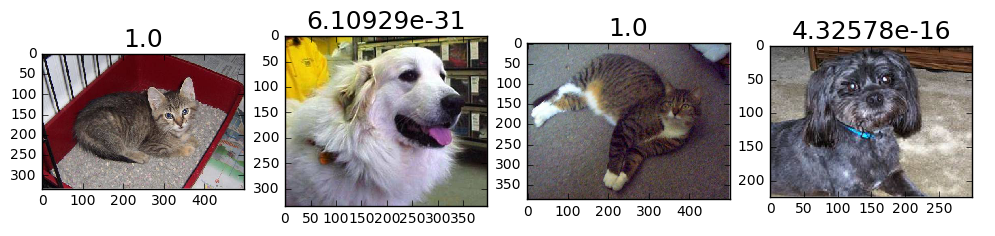

In [48]:
#1. A few correct labels at random
correct = np.where(preds==labels)[0]
idx = np.random.permutation(correct)[:n_view]
plots_idx(idx, probs[idx])

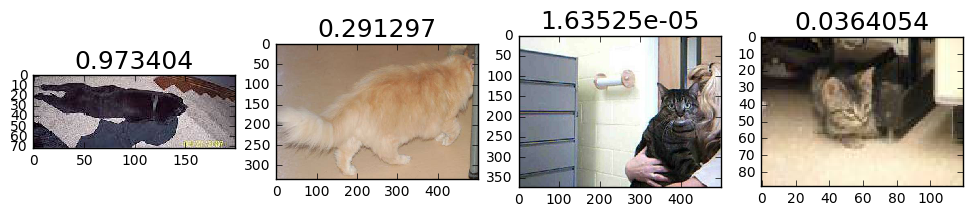

In [49]:
#2. A few incorrect labels at random
incorrect = np.where(preds!=labels)[0]
idx = np.random.permutation(incorrect)[:n_view]
plots_idx(idx, probs[idx])

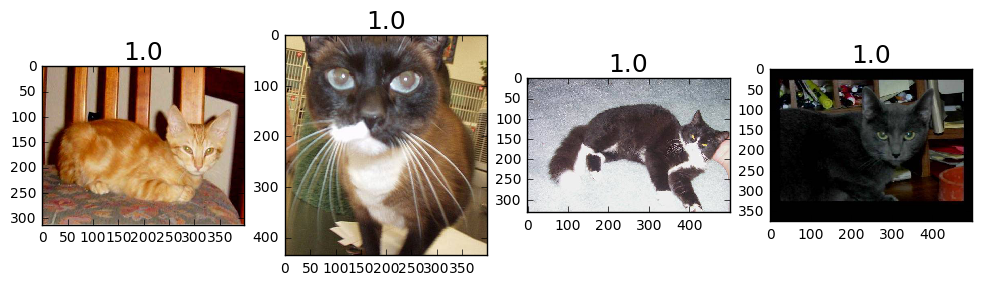

In [56]:
#3. The images we most confident were cats, and are actually cats
correct_cats = np.where((preds==0) & (preds==labels))[0]
most_correct_cats = np.argsort(probs[correct_cats])[::-1][:n_view]
plots_idx(correct_cats[most_correct_cats], probs[correct_cats][most_correct_cats])

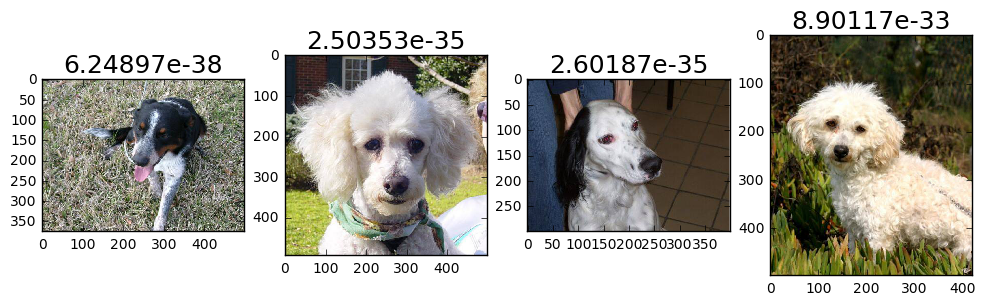

In [57]:
# as above, but dogs
correct_dogs = np.where((preds==1) & (preds==labels))[0]
most_correct_dogs = np.argsort(probs[correct_dogs])[:n_view]
plots_idx(correct_dogs[most_correct_dogs], probs[correct_dogs][most_correct_dogs])

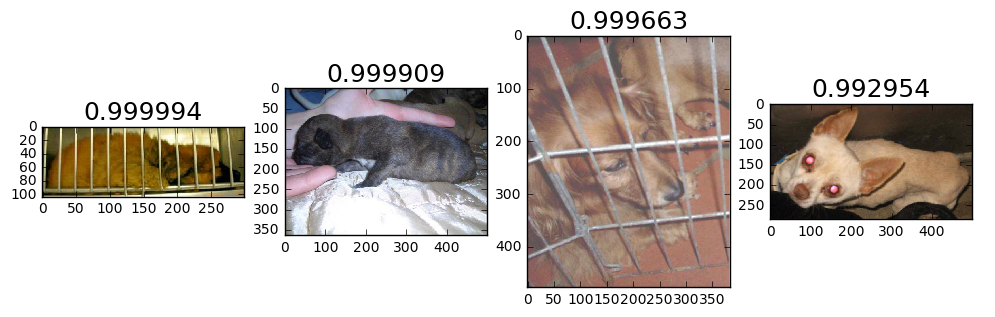

In [58]:
#3. The images we were most confident were cats, but are actually dogs
incorrect_cats = np.where((preds==0) & (preds!=labels))[0]
most_incorrect_cats = np.argsort(probs[incorrect_cats])[::-1][:n_view]
plots_idx(incorrect_cats[most_incorrect_cats], probs[incorrect_cats][most_incorrect_cats])

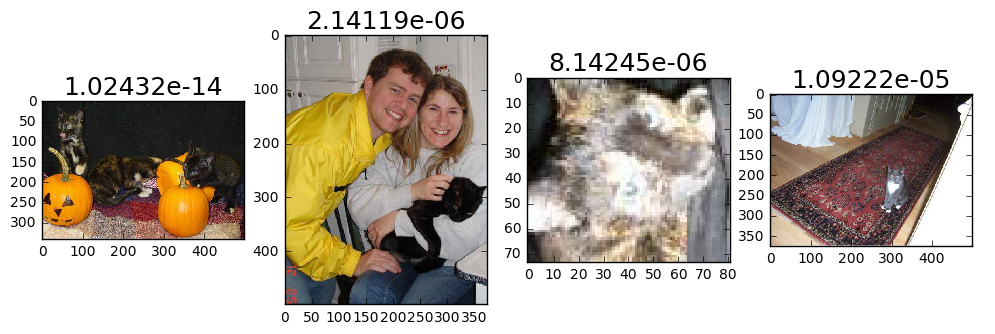

In [59]:
#3. The images we were most confident were dogs, but are actually cats
incorrect_dogs = np.where((preds==1) & (preds!=labels))[0]
most_incorrect_dogs = np.argsort(probs[incorrect_dogs])[:n_view]
plots_idx(incorrect_dogs[most_incorrect_dogs], probs[incorrect_dogs][most_incorrect_dogs])

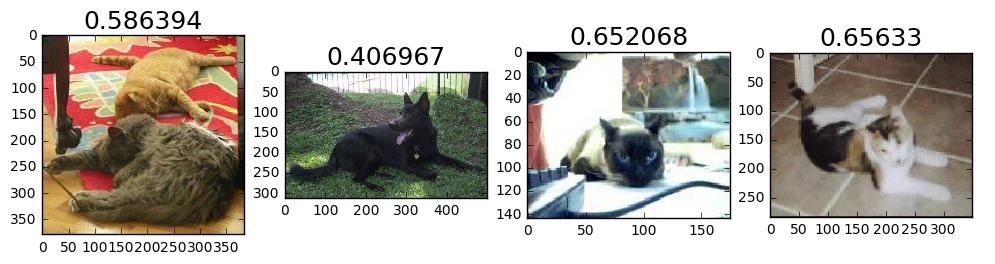

In [60]:
#5. The most uncertain labels (ie those with probability closest to 0.5).
most_uncertain = np.argsort(np.abs(probs-0.5))
plots_idx(most_uncertain[:n_view], probs[most_uncertain])

In [62]:
import sklearn as sk
cm = sk.metrics.confusion_matrix(labels, preds)

In [67]:
sk.plot_confusion_matrix(cm, val_batches.class_indices)

AttributeError: 'module' object has no attribute 'plot_confusion_matrix'